# 任务理解

### 1.标注数据来源
### 2.任意新闻类网页正文内容块的抽取
### 3.具体位置实体标识
### 4.图像/附件等非结构化非文本信息的处理

# 探索

In [3]:
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]
mpl.rcParams["axes.unicode_minus"]=False
from selenium import webdriver
from  time import sleep
import pandas as pd
import json
from  random import random
import re

# 测试/探索

### 初步分析

In [4]:
# url = 'https://mp.weixin.qq.com/s/03w_HdZGypbtAG33jikquw'
url = "https://baijiahao.baidu.com/s?id=1657795127584927321&wfr=spider&for=pc"
header = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:36.0) Gecko/20100101 Firefox/36.0'}
response = requests.get(url, headers=header)
html = response.text

# soup = BeautifulSoup(html, 'lxml')

# s = soup.get_text()

# dr = re.compile(r'<[^>]+>',re.S)
# dd = dr.sub('',s)

soup = BeautifulSoup(html, features="html.parser")
for script in soup(["script", "style"]):
    script.decompose()
text = soup.get_text()

print(text)


沈阳已公布22名新冠肺炎确诊患者行程轨迹！最全汇总，速速自查百度首页登录个人中心帐号设置意见反馈退出沈阳已公布22名新冠肺炎确诊患者行程轨迹！最全汇总，速速自查沈阳晚报发布时间：02-0621:43《沈阳晚报》官方帐号沈阳市新型冠状病毒感染的肺炎疫情排查公告（八）我市新型冠状病毒感染的肺炎确诊病例已在定点医疗机构隔离治疗，病情稳定。一、确诊病例情况及行程轨迹患者温某某，男，58岁，沈阳市某公司负责人。现住址沈阳市铁西区凯旋门小区。根据目前已经掌握的信息：患者1月10日7时11分出现在地铁沈阳站西出口，后乘坐G1272次列车从沈阳去往山海关。1月10日9时13分出现在河北省唐山市丰南区，后乘G1261次列车从山海关返回沈阳。17时2分出现在地铁二号线北站进站口。1月11日9时29分出现在中国医科大学附属盛京医院滑翔院区1号楼北门电梯前。1月14日、15日在其家附近出现。1月17日8时32分出现在中国医科大学附属盛京医院滑翔院区1号楼北门电梯前。1月21日和1月28日在其家附近出现。患者1月27日-1月31日每日有专人接送往返于中国医科大学附属盛京医院滑翔院区门急诊与其家，未乘坐公共交通工具。27日就诊当天，先去门急诊，后去发热门诊，然后又返回门急诊。1月29日曾去CT室做胸部X线检查。2月1日-2月2日收住于中国医科大学附属盛京医院滑翔院区门急诊留观室。2月3日转入中国医科大学附属盛京医院滑翔院区发热门诊进行隔离治疗。2月4日22时45分，该患被诊断为新型冠状病毒感染的肺炎确诊病例。二、温馨提示：现提醒在上述过程中与患者有过密切接触的市民，按传染病防治有关规定，需采取如下措施：1.立即向所在社区或村委会登记备案，社区或村委会要第一时间向所在地新型冠状病毒防控指挥部报告，并持续跟踪反馈情况，实行每日零报告制度；2.与患者接触后，暂不要外出，减少与家人接触，从与患者接触之日起，居家隔离观察14天；3.在此期间若出现发热、乏力、咳嗽等呼吸道症状时，请第一时间与辖区疾病预防控制中心联系或佩戴口罩，前往当地卫生健康行政部门指定的医疗机构发热门诊规范就诊，就医途中，请勿乘坐公共交通工具，并全程佩戴口罩。沈阳市新型冠状病毒感染的肺炎疫情防控指挥部疫情防控组2020年2月6日 沈阳已公布的确诊病患行程汇总辽中区1人，1月22日下午5时20分在辽中区念慈堂殡葬服务中心参加朋友父亲葬礼

In [5]:
count = []

flag = 0
k = 0
row = 0
s = {}
s_c = ''

for si in text:
    if si != '\n':
        flag = 0 
        k+=1
        s_c += si
    else:
        flag = 1
        count.append(k)
        s[row+1] = s_c
        k=0
        s_c = ''
        row+=1

In [44]:
print (len(count))
# print (row)
# print(s)

# import numpy as np 
# arr=np.array(count)
# print(np.where(arr>100))

3


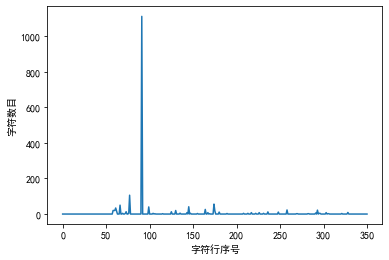

In [36]:
x = np.arange(row)
y = np.array(count)
# plt.hist( y, color="g", histtype="bar", rwidth=1, alpha=0.6)
plt.plot(x,y)
plt.xlabel("字符行序号")
plt.ylabel("字符数目")
plt.show()

In [98]:
def get_row_char_distribution(url):
    '''request包，抓取url得到每行字符数量的分布'''
    # 爬取 取html标签符号
    header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4121.0 Safari/537.36 Edg/84.0.495.0'
    }
    r = requests.get(url, headers=header)
    r.encoding="utf-8"
    html = r.text
    soup = BeautifulSoup(html, features="html.parser")
    for script in soup(["script", "style"]):
        script.decompose()
    text = soup.get_text()
    
    # 每行的字符数目统计
    
    count = []
    flag = 0
    k = 0
    row = 0
    s = {}
    s_c = ''

    for si in text:
        if si != '\n':
            flag = 0 
            k+=1
            s_c += si
        else:
            flag = 1
            count.append(k)
            s[row+1] = s_c
            k=0
            s_c = ''
            row+=1
    

    # plt.hist( y, color="g", histtype="bar", rwidth=1, alpha=0.6)

    x = np.arange(1,len(count)+1,1)
    y = np.array(count)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    #设置标题
    ax1.set_title('Scatter Plot')
    plt.xlabel("字符行序号")
    plt.ylabel("字符数目")
    #画散点图
    ax1.scatter(x,y,c = 'r',marker = 'o')
    #设置图标
    plt.legend('长度')
    # 限制刻度
    my_x_ticks = np.arange(1, len(count)+1, 1)
    plt.xticks(my_x_ticks)   #设置坐标轴刻度
    #显示所画的图
    plt.show()
    print(s)

### 针对微博等有反爬的，采用模拟器来模拟

In [96]:
def get_row_char_distribution_driver(url):
    '''利用模拟器，抓取url得到每行字符数量的分布'''
    # 引擎
    driver = webdriver.Chrome()
    driver.get(url)
    sleep(10)
    ht =  driver.page_source
#     # 爬取 取html标签符号
#     header = {
#         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4121.0 Safari/537.36 Edg/84.0.495.0'
#     }
#     r = requests.get(url, headers=header)
#     r.encoding="utf-8"
#     html = r.text

    soup = BeautifulSoup(ht, features="html.parser")
    for script in soup(["script", "style"]):
        script.decompose()
    text = soup.get_text()
    
    # 每行的字符数目统计
    
    count = []
    flag = 0
    k = 0
    row = 0
    s = {}
    s_c = ''

    for si in text:
        if si != '\n':
            flag = 0 
            k+=1
            s_c += si
        else:
            flag = 1
            count.append(k)
            s[row+1] = s_c
            k=0
            s_c = ''
            row+=1
    

    # plt.hist( y, color="g", histtype="bar", rwidth=1, alpha=0.6)

    x = np.arange(1,len(count)+1,1)
    y = np.array(count)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    #设置标题
    ax1.set_title('Scatter Plot')
    plt.xlabel("字符行序号")
    plt.ylabel("字符数目")
    #画散点图
    ax1.scatter(x,y,c = 'r',marker = 'o')
    #设置图标
    plt.legend('长度')
    # 限制刻度
    my_x_ticks = np.arange(1, len(count)+1, 1)
    plt.xticks(my_x_ticks)   #设置坐标轴刻度
    #显示所画的图
    plt.show()
    print(s)

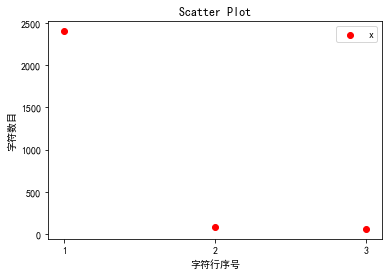

{1: '江门第4例患者19岁，曾在武汉当厨工，回来后到酒吧餐馆商场江门第4例患者19岁，曾在武汉当厨工，回来后到酒吧餐馆商场南方都市报 • 南都江门原创2020-02-03 12:17查看南都讯\xa0 2月3日上午，省卫生健康委公布江门市新增1例新型冠状病毒感染的肺炎确诊病例。这是江门市第4例确诊病例，也是开平首例确诊病例。江门市新型冠状病毒感染的肺炎防控指挥部周密部署，经过反复走访，对该例确诊病例密切接触人员进行了细致排查，现将有关情况公布如下。1月21日从武汉回到江门第4例确诊病例姓李，男性，19岁，家住开平市金鸡镇，之前在武汉市江岸区当厨工，1月20日，他与同事、老乡邓某一起驾车，从武汉出发，于1月21日凌晨2时42分到达开平。经过多方走访，了解到李某在开平活动情况：到达开平后，李某与邓某在祥龙中路澳味餐馆吃饭，随后到位于祥龙三区45号的邓某家中短暂休息。6时45分，李某出门搭乘摩托车（车牌JA9G42，车主司徒某）到宝庭园附近下车，于7时18分许坐客车（车牌J42955，司机梁某，当时车上已满座），8时4分到达开平市金鸡镇，9时40分许与母亲等亲人汇合，坐母亲摩托车到金鸡镇圩，李某与3名亲人一起登上台山那扶总站开往长沙车站的客车（车牌J42739，司机关某），10时40分许在长沙车站下车。下车后，李某等4人打滴滴快车（车牌J6M255，车主李某）到长兴路威尼斯沐足店附近下车，步行至步行街龙尾的翠园餐馆，与表伯、表母聚餐。饭后，李某四人步行至益华广场后面的日兴药店约上堂嫂，5人在益华广场的酷宝贝童装店买衣服、在梦幻成真游乐园坐碰碰车。13时45分许，5人离开。李某堂嫂回去上班，李某等四人步行至祥苑路海清甜甜品店吃糖水。15时8分，李某等四人打滴滴快车（车牌J322K1，车主邓某）至长沙车站附近，15时41分许在碧丽宫酒店附近搭乘面包车（车牌JBS418，车主敖某）回金鸡镇。16时28分到达金鸡镇圩后各自回家，李某回家休息。1月22日下午4时，李某到开平市金鸡镇游东田心村，参加同学关某的入伙喜宴，李某坐靠近水塘第二席，同席人员共10人（除李某母亲、妹妹外，还有村民7人）。当晚8时21分许，李某和同学李某至金鸡镇圩搭乘面包车（车牌J78A01，车主池某）到开平市区宝庭园附近下车，在周边闲逛后，于10时2分坐一辆小汽车（车牌J97N89，车主劳某）到花园酒店附近

In [77]:
get_row_char_distribution("https://m.mp.oeeee.com/a/BAAFRD000020200203257514.html?layer=4&share=chat&isndappinstalled=12")

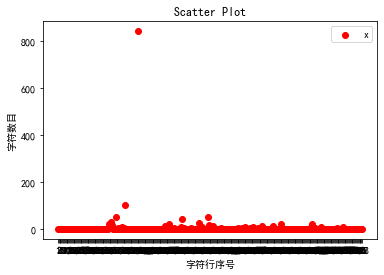

{1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '', 8: '', 9: '', 10: '', 11: '', 12: '', 13: '', 14: '', 15: '', 16: '', 17: '', 18: '', 19: '', 20: '', 21: '', 22: '', 23: '', 24: '', 25: '', 26: '', 27: '', 28: '', 29: '', 30: '', 31: '', 32: '', 33: '', 34: '', 35: '', 36: '', 37: '', 38: '', 39: '', 40: '', 41: '', 42: '', 43: '', 44: '', 45: '', 46: '', 47: '', 48: '', 49: '', 50: '', 51: '', 52: '', 53: '', 54: '', 55: '', 56: '', 57: '', 58: '', 59: '                    ', 60: '                    ', 61: '                    ', 62: '疫情通报 | 3月5日广州市新增1例新冠肺炎确诊病例情况', 63: '                ', 64: '', 65: '', 66: '', 67: '                        广州卫健委                      ', 68: '', 69: '', 70: '广州卫健委', 71: '', 72: '', 73: '微信号', 74: 'gzwjwwx', 75: '', 76: '', 77: '功能介绍', 78: '广州卫健委公众号（gzwjwwx) 是广州市卫生健康委员会倾力打造的综合资讯和服务平台。旨在为市民提供便捷的政务和医疗卫生服务，权威发布卫生健康信息，宣传卫生健康政策，科普卫生健康知识，倡导健康生活方式。', 79: '', 80: '', 81: '', 82: '', 83: '', 84: '', 85: '', 86: '', 87: '', 88: '', 89: '', 90: '', 91: '', 92: 

In [78]:
get_row_char_distribution("https://mp.weixin.qq.com/s/22zfhtcc5aqqWpt0anCVOQ")

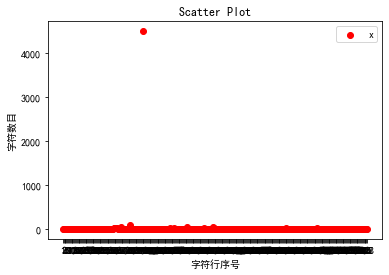

{1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '', 8: '', 9: '', 10: '', 11: '', 12: '', 13: '', 14: '', 15: '', 16: '', 17: '', 18: '', 19: '', 20: '', 21: '', 22: '', 23: '', 24: '', 25: '', 26: '', 27: '', 28: '', 29: '', 30: '', 31: '', 32: '', 33: '', 34: '', 35: '', 36: '', 37: '', 38: '', 39: '', 40: '', 41: '', 42: '', 43: '', 44: '', 45: '', 46: '', 47: '', 48: '', 49: '', 50: '', 51: '', 52: '', 53: '', 54: '', 55: '', 56: '', 57: '', 58: '', 59: '                    ', 60: '                    ', 61: '                    ', 62: '截至2020年2月13日24时，肇庆市新冠肺炎疫情情况通报', 63: '                ', 64: '', 65: '', 66: '', 67: '                        健康肇庆                      ', 68: '', 69: '', 70: '健康肇庆', 71: '', 72: '', 73: '微信号', 74: 'zhaoqingwjj', 75: '', 76: '', 77: '功能介绍', 78: '欢迎您！"健康肇庆"会不定期更新肇庆市卫生健康工作动态、健康教育、优生优育、健康常识和卫生健康政策法规等内容，是您了解肇庆市卫生健康局发展情况的移动信息平台，感谢您对肇庆卫生健康事业的支持！', 79: '', 80: '', 81: '', 82: '', 83: '', 84: '', 85: '', 86: '', 87: '', 88: '', 89: '', 90: '', 91: '', 92: '最新消

In [79]:
get_row_char_distribution("https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA")

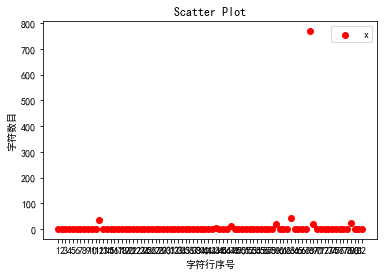

{1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '', 8: '', 9: '', 10: '', 11: '', 12: '陕西省卫生健康委员会 卫健要闻 陕西新增4例新冠肺炎 确诊病例累计229例', 13: '', 14: '', 15: '', 16: '', 17: '', 18: '', 19: '', 20: '', 21: '', 22: '', 23: '', 24: '', 25: '', 26: '', 27: '', 28: '', 29: '', 30: '', 31: '', 32: '', 33: '', 34: '', 35: '\x00\r', 36: '', 37: '', 38: '', 39: '', 40: '', 41: '', 42: '', 43: '当前位置：', 44: '首页', 45: '', 46: '', 47: '>新闻动态>卫健要闻', 48: '', 49: '', 50: '', 51: '', 52: '', 53: '', 54: '', 55: '', 56: '', 57: '', 58: '', 59: '陕西新增4例新冠肺炎 确诊病例累计229例', 60: '', 61: '', 62: '', 63: '来源：省卫生健康委发布时间：2020-02-13  10:01字体：【 大 中 小 】', 64: '', 65: '', 66: '', 67: '', 68: '截至2月13日10时，陕西新增4例新冠肺炎确诊病例，新增疑似病例53例。新增确诊病例中，西安市4例。陕西累计报告新冠肺炎确诊病例229例（42例治愈出院），其中输入性病例115例，密切接触者100例，无明确接触史病例14例。累计确诊病例中，西安市114例、宝鸡市13例、咸阳市17例、铜川市8例、渭南市14例、延安市8例、榆林市3例、汉中市21例、安康市22例、商洛市7例、杨凌示范区1例，韩城市1例。全省现有疑似病例304例。全省新增密切接触者829人，累计13562人，均集中医学观察。新增解除密切接触者590人，累计解除密切接触者7498人。患者1，男，58岁，现居西安市高新区。1月19日从上海市到西安市，2月2日出现症状，自行服药效果不佳。2月7日症状加重到西安高新医院就诊，

In [80]:
get_row_char_distribution("http://sxwjw.shaanxi.gov.cn/art/2020/2/13/art_9_67993.html")

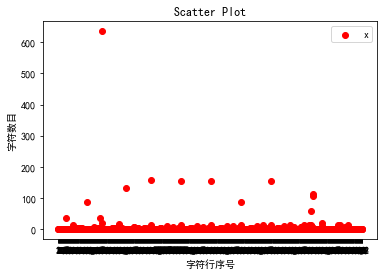

{1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '', 8: '', 9: '', 10: '', 11: '', 12: '', 13: '', 14: '', 15: '', 16: '', 17: '', 18: '', 19: '', 20: '', 21: '', 22: '', 23: '', 24: '', 25: '', 26: '#联防联控   高陵在行动# 紧急扩散！关于... 来自高陵融媒 - 微博', 27: '', 28: '', 29: '', 30: '', 31: '', 32: '', 33: '', 34: '', 35: '', 36: '', 37: '', 38: ' ', 39: '', 40: '', 41: '', 42: '', 43: '', 44: '', 45: '', 46: '', 47: '大家正在搜：虞书欣练习室直拍', 48: 'f', 49: '', 50: '', 51: '', 52: '', 53: '', 54: '', 55: '', 56: '', 57: '', 58: '', 59: '', 60: '', 61: 'E首页', 62: '\ue622视频', 63: 'F发现', 64: 'G游戏', 65: '', 66: '', 67: '', 68: '', 69: '注册', 70: '', 71: '登录', 72: '', 73: '', 74: '', 75: '', 76: '', 77: '', 78: '', 79: '', 80: '', 81: '', 82: '', 83: '', 84: '', 85: '', 86: '', 87: '<img width="0" height="0" src="//beacon.sina.com.cn/a.gif?noScript" border="0" alt="" />', 88: '', 89: ' ', 90: '', 91: '', 92: '', 93: '', 94: ' ', 95: '', 96: '', 97: '', 98: '', 99: '', 100: '', 101: '', 102: '', 103: '', 104: 'c', 105: '

In [95]:
get_row_char_distribution_driver("https://weibo.com/7129811001/IrH6peQ3d?from=page_1002067129811001_profile&wvr=6&mod=weibotime&type=comment#_rnd1581676880432")

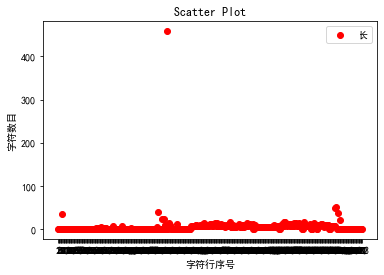

{1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '2月4日我市新确诊1例新型冠状病毒感染的肺炎病例-韶关市人民政府门户网', 8: '', 9: '', 10: '', 11: '', 12: '', 13: '', 14: '', 15: '', 16: '', 17: '', 18: '', 19: '', 20: '', 21: '', 22: '', 23: '', 24: '', 25: '', 26: '', 27: '', 28: '', 29: '', 30: '', 31: '', 32: '', 33: '', 34: '', 35: '', 36: '', 37: '', 38: '', 39: '', 40: '', 41: '', 42: '', 43: '', 44: '', 45: '', 46: '', 47: '', 48: '', 49: '', 50: '', 51: '', 52: '', 53: '', 54: '首页', 55: '', 56: '', 57: '新闻 ', 58: '', 59: '政务 ', 60: '', 61: '政务服务', 62: '', 63: '', 64: '民生 ', 65: '', 66: '互动 ', 67: '', 68: '市情 ', 69: '', 70: '', 71: '', 72: '', 73: '', 74: '简', 75: '繁', 76: 'EN', 77: '网站支持IPv6', 78: '', 79: '', 80: '', 81: '', 82: '', 83: '', 84: '', 85: '', 86: '', 87: '', 88: '', 89: '', 90: '韶关市人民政府', 91: '', 92: '', 93: '', 94: '', 95: '', 96: '', 97: '', 98: '', 99: '', 100: '', 101: '', 102: '', 103: '便捷', 104: '', 105: '', 106: '', 107: '', 108: '', 109: '', 110: '', 111: '', 112: '', 113: '', 114: '', 115:

In [99]:
get_row_char_distribution("https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/content/post_1756096.html")

### 导入url数据

In [392]:
df=pd.read_excel('./websites.xlsx')
height,width = df.shape
print(height,width,type(df))
df.rename(columns={'疫情通报网址':'url'}, inplace=True)
df['url_fix'] = df['url'].apply(lambda x: x.replace(' ',''))

193 1 <class 'pandas.core.frame.DataFrame'>


In [393]:
df

,url
0,https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1u...
1,http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf8972...
2,http://m.ha.bendibao.com/mip/1636.shtm
3,http://news.gxnews.com.cn/staticpages/20200209...
4,http://o.xiancity.cn/system/2020/02/09/0307133...
...,...
188,https://weibo.com/7129811001/ItKAzr93p?from=pa...
189,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
190,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
191,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...


### 获取数据函数，考虑模拟和不模拟两种情况

In [395]:
def get_data(url,use_webdriver=False,print_plot=False,print_textdict=False):
    '''返回每一条url的标题及其文本分布矩阵'''
    if 'weibo' in url:
        use_webdriver=True
        
        
    if use_webdriver:
        # 用引擎
        driver = webdriver.Chrome()
        driver.get(url)
        sleep(5)
        html =  driver.page_source
    else:
        # 用request
        header = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4121.0 Safari/537.36 Edg/84.0.495.0'
        }
        r = requests.get(url, headers=header)
        r.encoding="utf-8"
        html = r.text
        
    # 去html的css和脚本
    soup = BeautifulSoup(html, features="html.parser")
    if soup.title is not None:
        title = soup.title.text
    else:
        title = 'unknow'
        
    for script in soup(["script", "style"]):
        script.decompose()
    text = soup.get_text()
    
    # 每行的字符数目统计
    count = []
    flag = 0
    k = 0
    row = 0
    s = {}
    s_c = ''

    for si in text:
        if si != '\n':
            flag = 0 
            k+=1
            s_c += si
        else:
            flag = 1
            count.append(k)
            s[row+1] = s_c
            k=0
            s_c = ''
            row+=1
    
    if s_c != '':
        flag = 1
        count.append(k)
        s[row+1] = s_c
        k=0
        s_c = ''
        row+=1
    

    # plt.hist( y, color="g", histtype="bar", rwidth=1, alpha=0.6)

    x = np.arange(1,len(count)+1,1)
    y = np.array(count)
    if print_plot:
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        #设置标题
        ax1.set_title('Scatter Plot')
        plt.xlabel("字符行序号")
        plt.ylabel("字符数目")
        #画散点图
        ax1.scatter(x,y,c = 'r',marker = 'o')
        #设置图标
        plt.legend('len')
        # 限制刻度
        my_x_ticks = np.arange(1, len(count)+1, 1)
        plt.xticks(my_x_ticks)   #设置坐标轴刻度
        #显示所画的图
        plt.show()
    if print_textdict:
        print (s)
    return title,y,s



# 测试

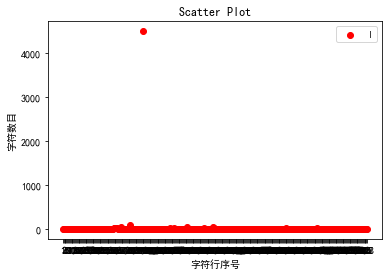

{1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '', 8: '', 9: '', 10: '', 11: '', 12: '', 13: '', 14: '', 15: '', 16: '', 17: '', 18: '', 19: '', 20: '', 21: '', 22: '', 23: '', 24: '', 25: '', 26: '', 27: '', 28: '', 29: '', 30: '', 31: '', 32: '', 33: '', 34: '', 35: '', 36: '', 37: '', 38: '', 39: '', 40: '', 41: '', 42: '', 43: '', 44: '', 45: '', 46: '', 47: '', 48: '', 49: '', 50: '', 51: '', 52: '', 53: '', 54: '', 55: '', 56: '', 57: '', 58: '', 59: '                    ', 60: '                    ', 61: '                    ', 62: '截至2020年2月13日24时，肇庆市新冠肺炎疫情情况通报', 63: '                ', 64: '', 65: '', 66: '', 67: '                        健康肇庆                      ', 68: '', 69: '', 70: '健康肇庆', 71: '', 72: '', 73: '微信号', 74: 'zhaoqingwjj', 75: '', 76: '', 77: '功能介绍', 78: '欢迎您！"健康肇庆"会不定期更新肇庆市卫生健康工作动态、健康教育、优生优育、健康常识和卫生健康政策法规等内容，是您了解肇庆市卫生健康局发展情况的移动信息平台，感谢您对肇庆卫生健康事业的支持！', 79: '', 80: '', 81: '', 82: '', 83: '', 84: '', 85: '', 86: '', 87: '', 88: '', 89: '', 90: '', 91: '', 92: '最新消

In [360]:
t,y,s = get_data('https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1uYnYA',print_plot=True,print_textdict=True)


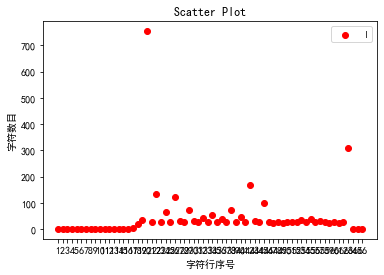

{1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '微博', 8: '', 9: '', 10: '', 11: '', 12: '', 13: '', 14: '', 15: '', 16: '', 17: '微博正文', 18: '              新浪陕西', 19: '              2-8 23:06 来自 iPhone 11', 20: '              已编辑关注#陕西防控新型肺炎#  【西安小寨银泰城一KFC前台确诊新冠肺炎 活动轨迹公布，急寻相关接触者】雁塔区新型冠状病毒感染的肺炎疫情防控指挥部办公室对一名新型冠状病毒感染的肺炎患者进行流行病学调查追踪时发现，该患者于2020年1月12日乘坐K1131次（4号车厢108座位）从郑州到西安，到西安火车站后于16:00—17:00之间乘坐5路公交车到达西北水电家属院5-2-612。1月13日下午，前往东仪路职工活动中心，来回乘坐204/709路车,电子正街站到电子二路口站，其余时间未外出。1月14日22:00—23:00之间乘坐5路从子午路站至紫薇城市花园站。1月17—25日在KFC朱雀店（小寨银泰城店）前台打工，主要工作为备餐，工作时间为10:00—22:00，每天9:00—10:00乘坐214/709路（电子正街至子午路站），22:00—23:00之间乘坐5路车（子午路至紫薇花园站）返回家中。目前该乘客被确诊为新型冠状病毒感染的肺炎确诊患者。现提醒有以上共同出行史及活动轨迹的人员请注意：1、第一时间主动联系所在街道办（社区）做好报备工作，配合做好居家医学观察14天（自同乘之日算起）。2、居家医学观察期内，实行每日早晚两次体温测试记录，并上报所在街道办及辖区社区卫生服务机构。3、同乘（司机、乘客）及相同轨迹人员如有发热、咳嗽等症状，请及时到发热门诊就诊，就诊过程请全程佩戴口罩，不要乘坐公共交通工具，不要进入人群密集场所。咨询电话：029-89353633雁塔区新型冠状病毒感染的肺炎疫情防控指挥部办公室2020年2月8日 西安 西安转发57评论91赞170鱼薇菲为什么十几号从郑州回来也被感染了。。。发病期潜伏期时间能对上嘛？有没有可能是哪个顾客传给她的？', 21: '                2-8 23:14', 22

In [361]:
t,y,s = get_data('https://m.weibo.cn/2162541102/4469831778965414',print_plot=True,print_textdict=True)


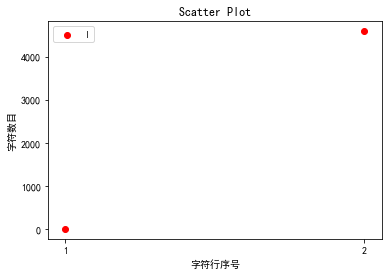

{1: '', 2: '沈阳已公布22名新冠肺炎确诊患者行程轨迹！最全汇总，速速自查百度首页登录个人中心帐号设置意见反馈退出沈阳已公布22名新冠肺炎确诊患者行程轨迹！最全汇总，速速自查沈阳晚报发布时间：02-0621:43《沈阳晚报》官方帐号沈阳市新型冠状病毒感染的肺炎疫情排查公告（八）我市新型冠状病毒感染的肺炎确诊病例已在定点医疗机构隔离治疗，病情稳定。一、确诊病例情况及行程轨迹患者温某某，男，58岁，沈阳市某公司负责人。现住址沈阳市铁西区凯旋门小区。根据目前已经掌握的信息：患者1月10日7时11分出现在地铁沈阳站西出口，后乘坐G1272次列车从沈阳去往山海关。1月10日9时13分出现在河北省唐山市丰南区，后乘G1261次列车从山海关返回沈阳。17时2分出现在地铁二号线北站进站口。1月11日9时29分出现在中国医科大学附属盛京医院滑翔院区1号楼北门电梯前。1月14日、15日在其家附近出现。1月17日8时32分出现在中国医科大学附属盛京医院滑翔院区1号楼北门电梯前。1月21日和1月28日在其家附近出现。患者1月27日-1月31日每日有专人接送往返于中国医科大学附属盛京医院滑翔院区门急诊与其家，未乘坐公共交通工具。27日就诊当天，先去门急诊，后去发热门诊，然后又返回门急诊。1月29日曾去CT室做胸部X线检查。2月1日-2月2日收住于中国医科大学附属盛京医院滑翔院区门急诊留观室。2月3日转入中国医科大学附属盛京医院滑翔院区发热门诊进行隔离治疗。2月4日22时45分，该患被诊断为新型冠状病毒感染的肺炎确诊病例。二、温馨提示：现提醒在上述过程中与患者有过密切接触的市民，按传染病防治有关规定，需采取如下措施：1.立即向所在社区或村委会登记备案，社区或村委会要第一时间向所在地新型冠状病毒防控指挥部报告，并持续跟踪反馈情况，实行每日零报告制度；2.与患者接触后，暂不要外出，减少与家人接触，从与患者接触之日起，居家隔离观察14天；3.在此期间若出现发热、乏力、咳嗽等呼吸道症状时，请第一时间与辖区疾病预防控制中心联系或佩戴口罩，前往当地卫生健康行政部门指定的医疗机构发热门诊规范就诊，就医途中，请勿乘坐公共交通工具，并全程佩戴口罩。沈阳市新型冠状病毒感染的肺炎疫情防控指挥部疫情防控组2020年2月6日 沈阳已公布的确诊病患行程汇总辽中区1人，1月22日下午5时20分在辽中区念慈堂殡葬服

In [371]:
t,y,s = get_data('https://baijiahao.baidu.com/s?id=1657795127584927321&wfr=spider&for=pc',print_plot=True,print_textdict=True)

## 这种的分布有点散，不是单峰的

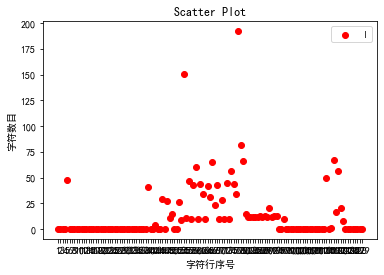

{1: '', 2: '', 3: '', 4: '', 5: '内蒙古自治区卫生健康委员会-紧急扩散-紧急扩散！呼和浩特急寻与这两名患者同乘交通工具人员及接触者', 6: '', 7: '', 8: '', 9: '', 10: '', 11: '', 12: '', 13: '', 14: '', 15: '', 16: '', 17: '', 18: '', 19: '', 20: '', 21: '', 22: '', 23: '', 24: '', 25: '', 26: '', 27: '', 28: '', 29: '', 30: '', 31: '', 32: '', 33: '', 34: '', 35: '', 36: '', 37: '', 38: '', 39: '首页 > 专题栏目 > 当前专题 > 新型冠状病毒感染的肺炎疫情防控 > 紧急扩散', 40: '', 41: '', 42: '紧急扩散', 43: '', 44: '', 45: '紧急扩散！呼和浩特急寻与这两名患者同乘交通工具人员及接触者', 46: '', 47: '发布日期：2020-02-01 13:46:05\u3000|\u3000', 48: '\t\t\t\t\t\t文章来源：', 49: '呼和浩特日报\u3000|\u3000浏览次数：次', 50: '', 51: '', 52: '\u3000\u3000关于急寻与患者同乘交通工具人员及接触者的协查通告', 53: '\u3000\u3000广大市民朋友：', 54: '\u3000\u3000切实做好疫情防控工作，加强联防联控，关乎您和家人及更多身边群众的身体健康、生命安全，也是每一位公民应尽的责任和义务。据近日通报反馈，宁夏蔡某某、吉林省王某某被确诊为新型冠状病毒感染的肺炎病例。二人1月17日-19日期间在呼和浩特市参加活动。为了准确查找与蔡某某、王某某有接触的人员，现发布如下通告：', 55: '\u3000\u3000一、蔡某某行程轨迹', 56: '\u3000\u3000蔡某某，户籍地：宁夏回族自治区吴忠市同心县，1月29日被确诊为新型冠状病毒感染的肺炎病例。', 57: '\u3000\u3000（一）1月17日', 58: '\u3000\u300022:04-23:05，从萨拉齐乘坐T4

In [372]:
t,y,s = get_data('http://wjw.nmg.gov.cn/doc/2020/02/01/286091.shtml',print_plot=True,print_textdict=True)



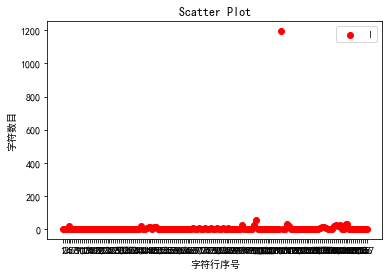

{1: '', 2: '', 3: '', 4: '山西省卫生健康委员会网站-卫健要闻', 5: '', 6: '', 7: '', 8: '', 9: '', 10: '', 11: '', 12: '', 13: '', 14: '', 15: '', 16: '', 17: '', 18: '', 19: '', 20: '', 21: '', 22: '', 23: '', 24: '', 25: '', 26: '', 27: '', 28: '', 29: '', 30: '', 31: '', 32: '', 33: '', 34: '', 35: '', 36: '', 37: '', 38: '', 39: '', 40: '', 41: '欢迎访问山西省卫生健康委员会网站！', 42: '', 43: '', 44: '远程接入平台 | ', 45: '\t\t    无障碍浏览 | ', 46: '\t\t    繁體中文', 47: ' | ', 48: '\t\t    加入收藏 | ', 49: '\t\t    设为首页', 50: '', 51: '', 52: '', 53: '', 54: '', 55: '', 56: '', 57: '', 58: '', 59: '', 60: '', 61: '', 62: '', 63: '', 64: '', 65: '', 66: '', 67: '', 68: '网站首页', 69: '', 70: '', 71: '主要职能', 72: '', 73: '', 74: '新闻中心', 75: '', 76: '', 77: '政务服务', 78: '', 79: '', 80: '信息公开', 81: '', 82: '', 83: '党建工作', 84: '', 85: '', 86: '交流互动', 87: '', 88: '', 89: '', 90: '', 91: '', 92: '', 93: '\t\t\t\t\t\t当前位置：首页 » 新闻中心 » 卫健要闻', 94: '', 95: '', 96: '', 97: '', 98: '', 99: '山西省2月7日新增7例确诊病例生活就诊轨迹 ', 100: '发布时间： 2020-02-08 20:33:52 

In [378]:
t,y,s = get_data('http://wjw.shanxi.gov.cn/wjywl02/24774.hrh',print_plot=True,print_textdict=True)

In [382]:
df

,url
0,https://mp.weixin.qq.com/s/HTsNM1zxEAx3IqoF1u...
1,http://hc.nc.gov.cn/ncwjw/gzdt/202002/b5cf8972...
2,http://m.ha.bendibao.com/mip/1636.shtm
3,http://news.gxnews.com.cn/staticpages/20200209...
4,http://o.xiancity.cn/system/2020/02/09/0307133...
...,...
188,https://weibo.com/7129811001/ItKAzr93p?from=pa...
189,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
190,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...
191,https://www.sg.gov.cn/xw/ztjj/yqfkyz/zxyq/cont...


## 保存数据：url+标题+每行字符串+每行字符数向量

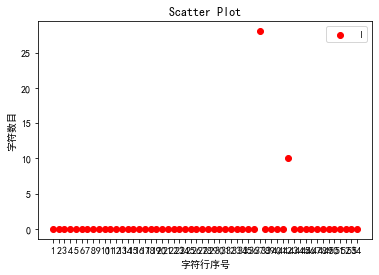

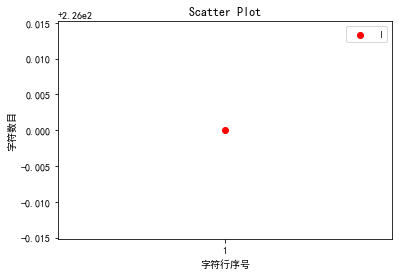

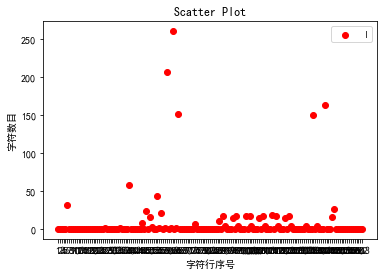

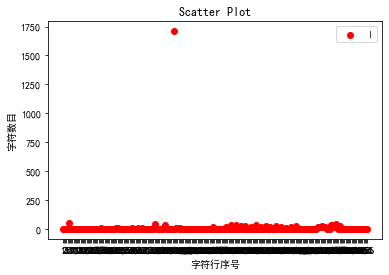

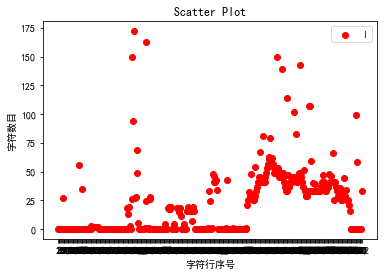

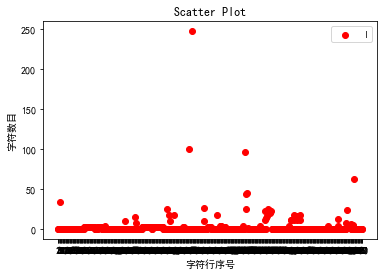

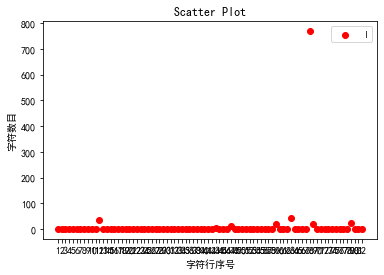

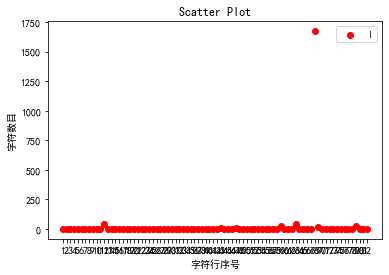

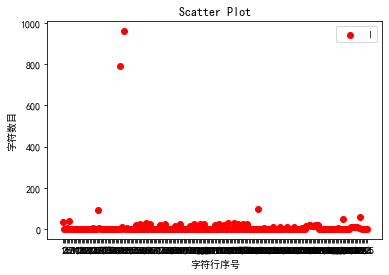

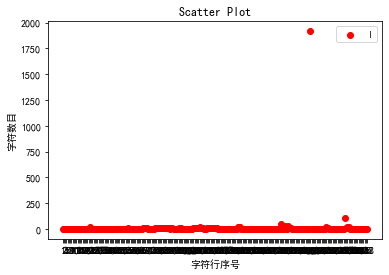

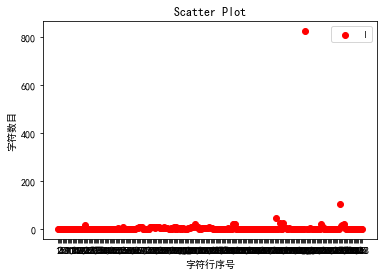

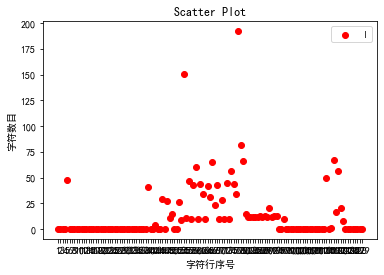

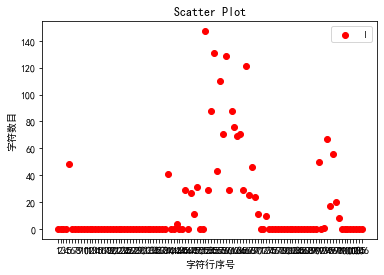

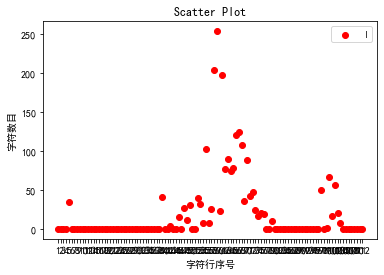

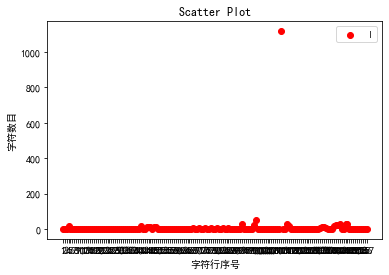

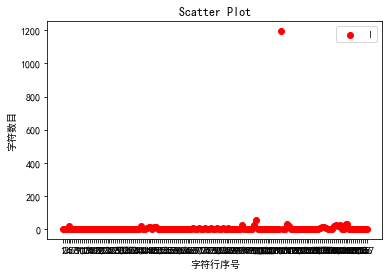

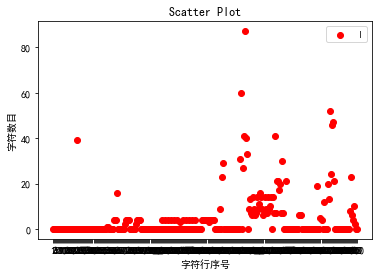

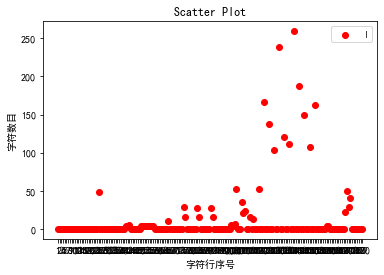

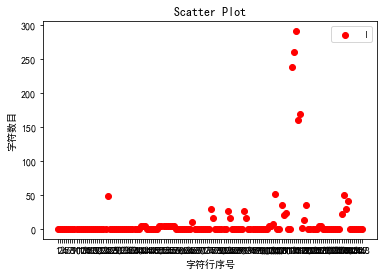

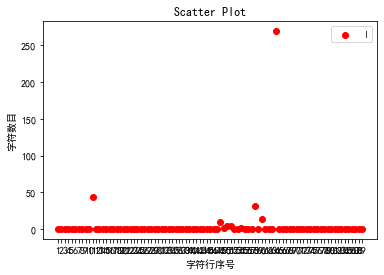

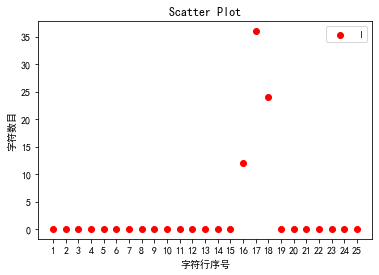

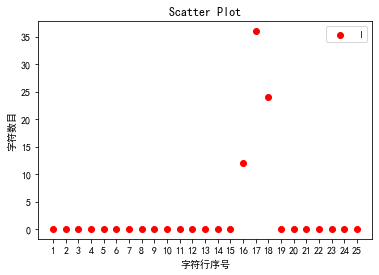

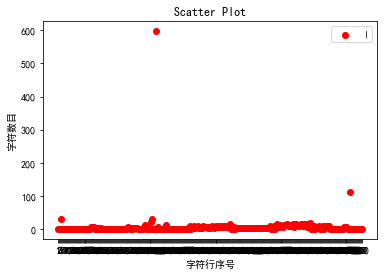

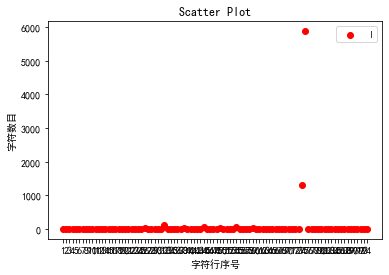

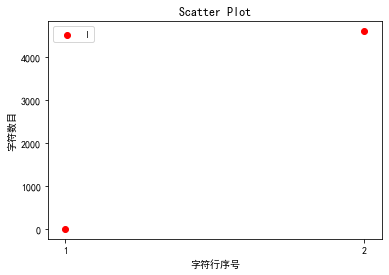

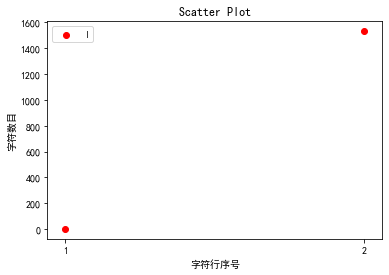

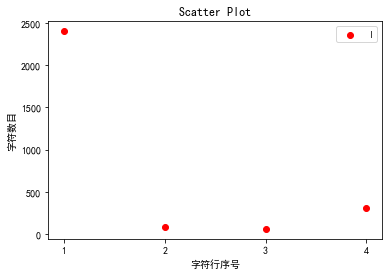

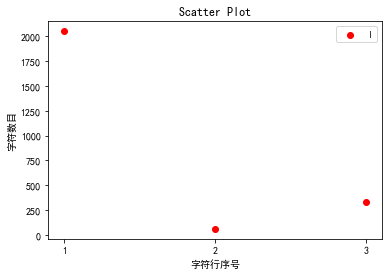

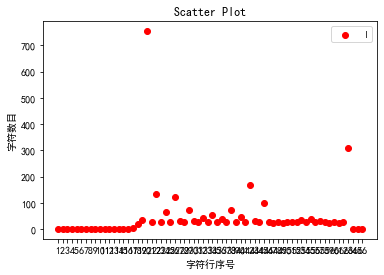

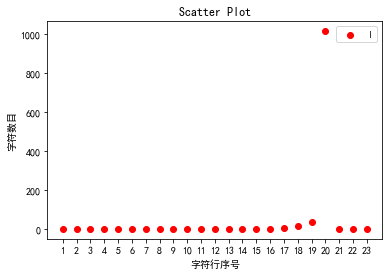

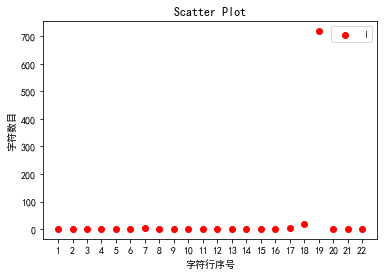

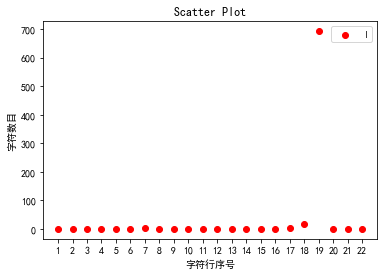

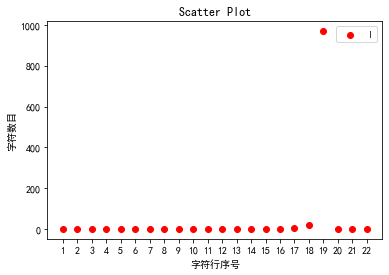

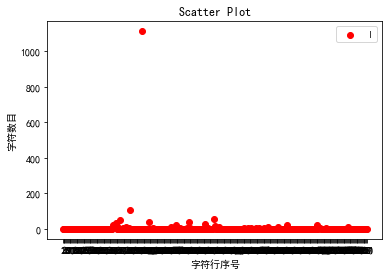

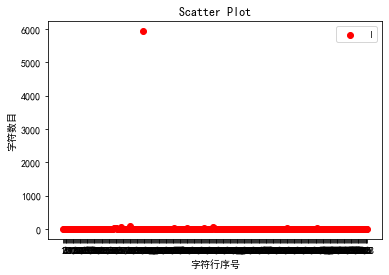

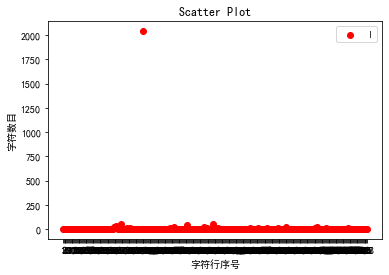

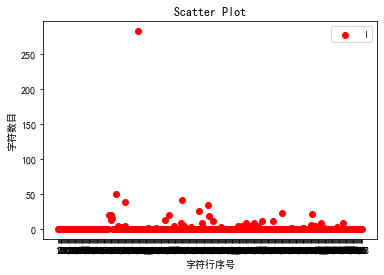

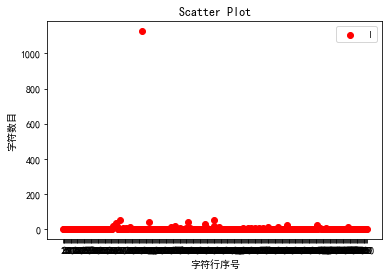

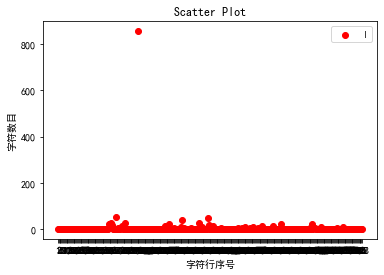

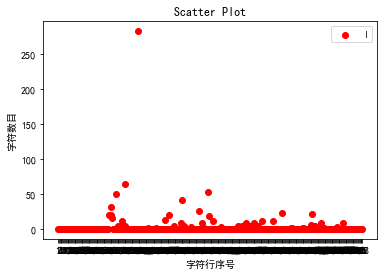

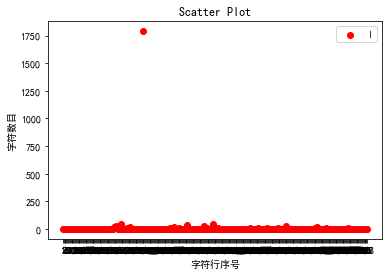

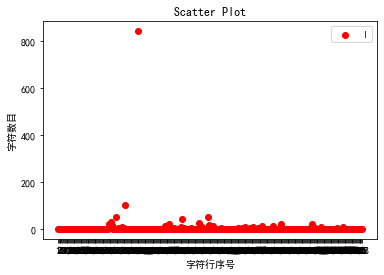

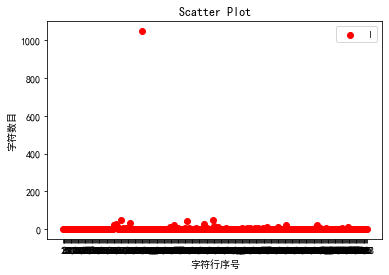

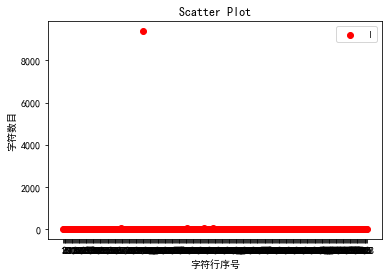

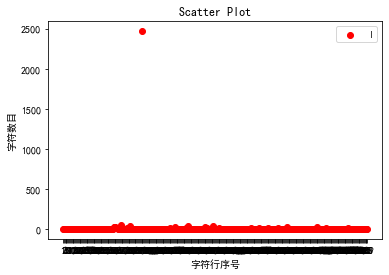

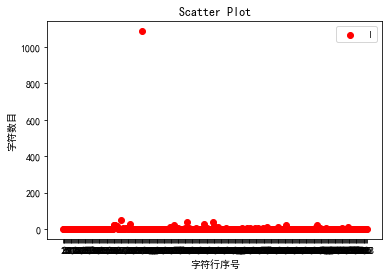

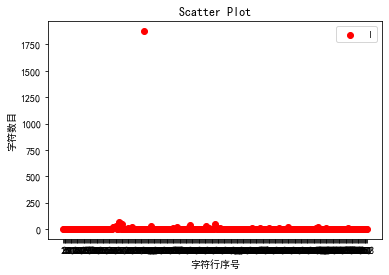

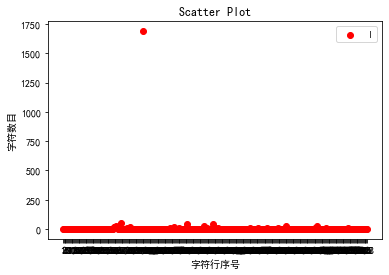

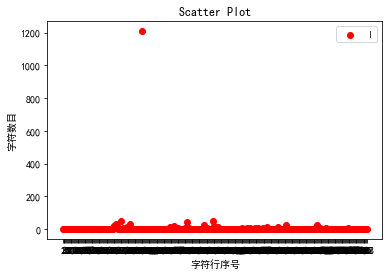

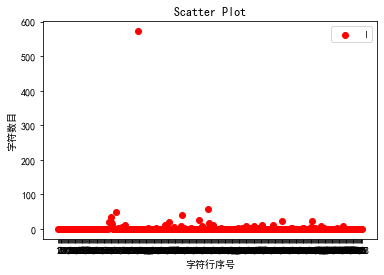

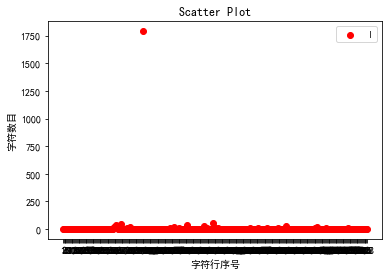

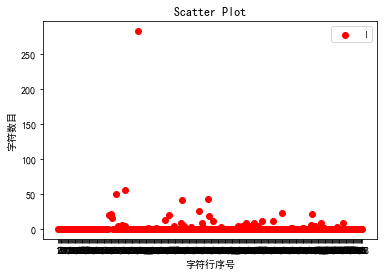

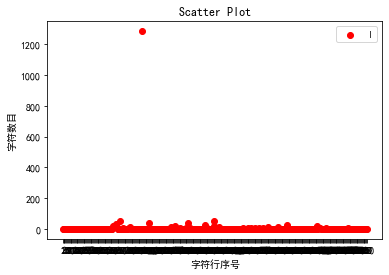

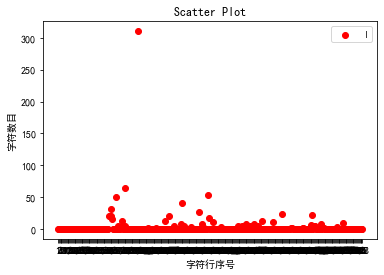

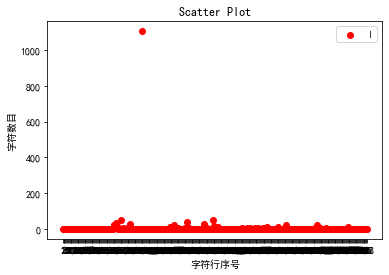

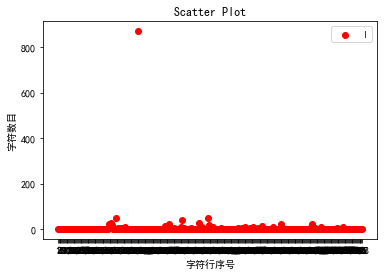

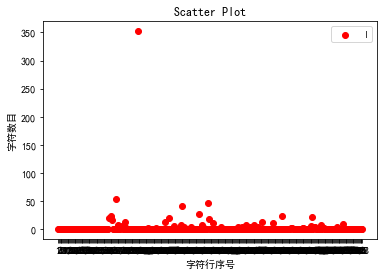

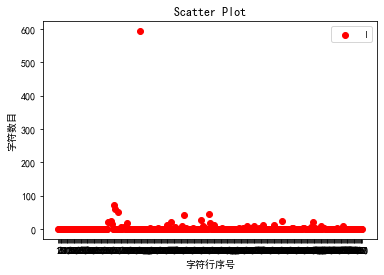

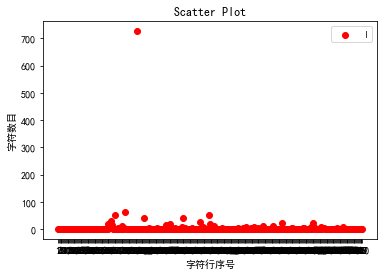

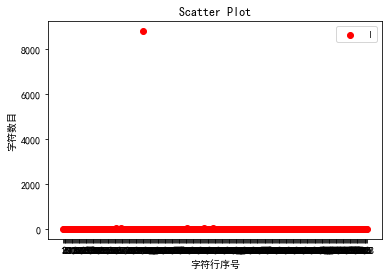

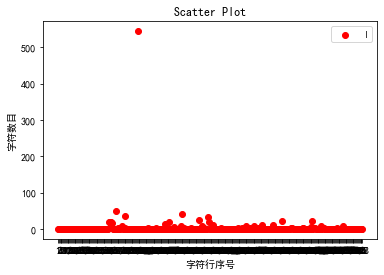

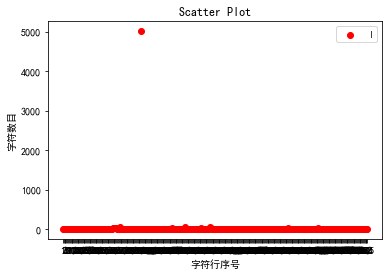

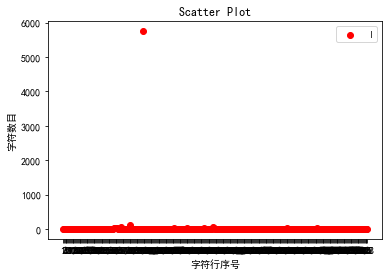

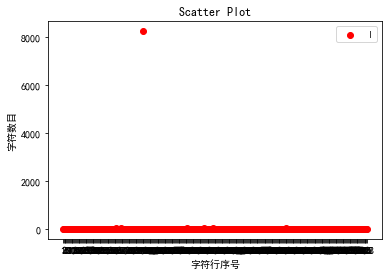

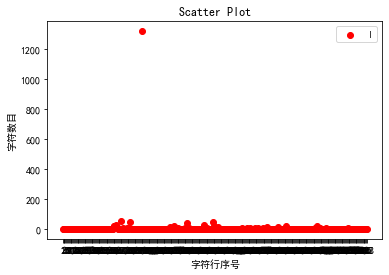

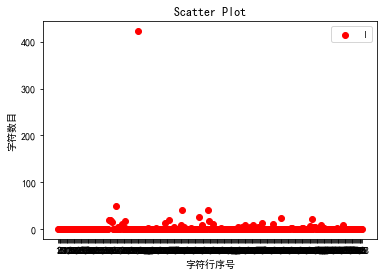

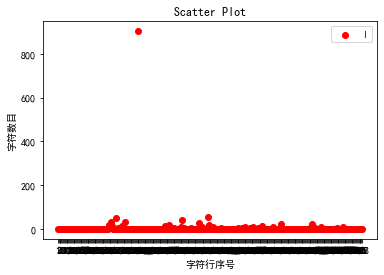

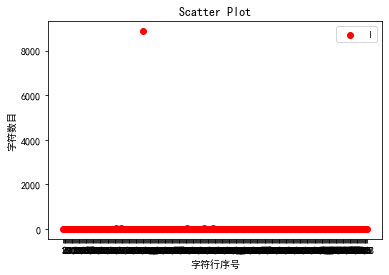

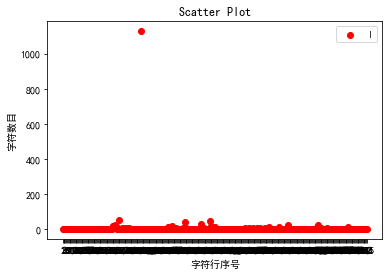

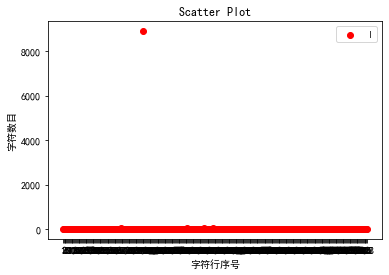

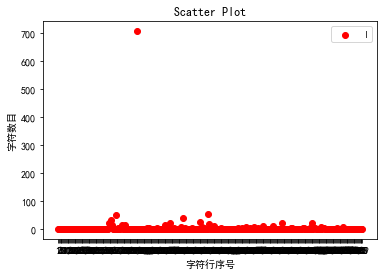

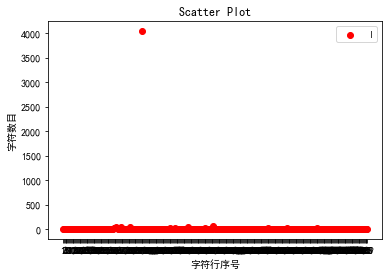

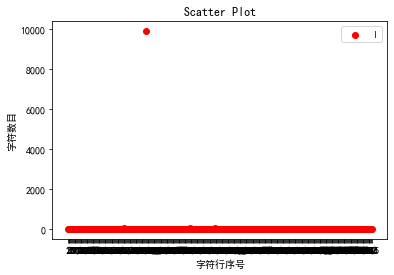

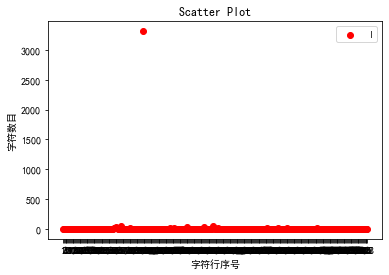

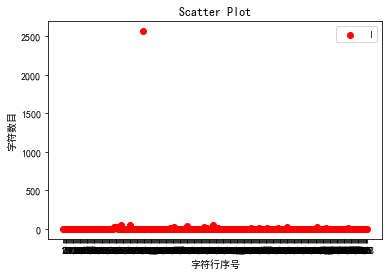

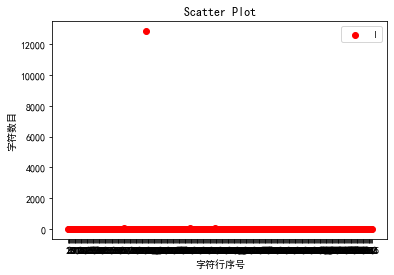

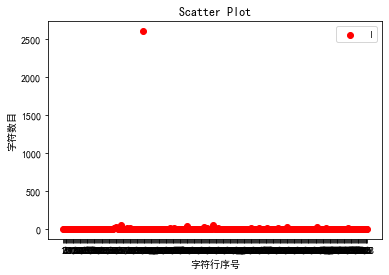

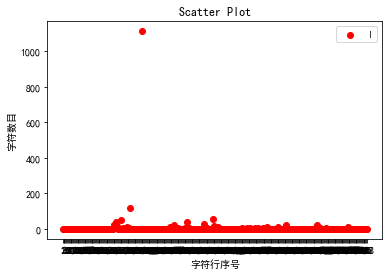

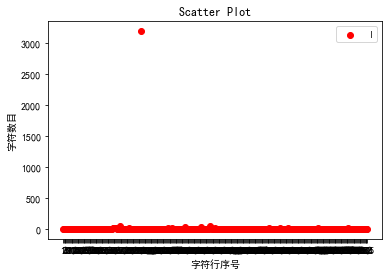

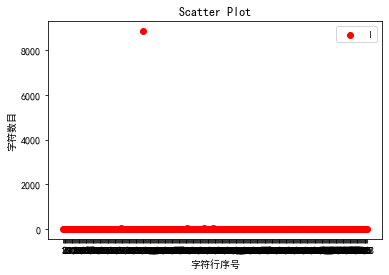

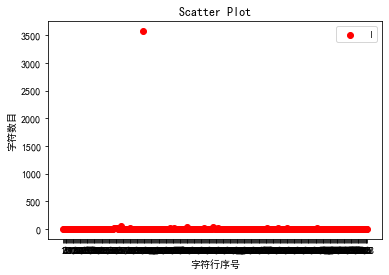

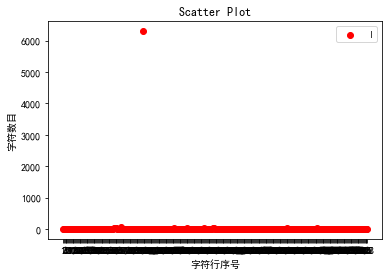

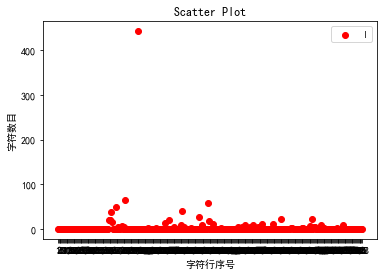

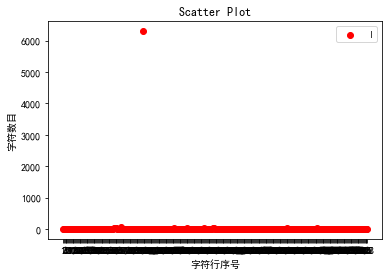

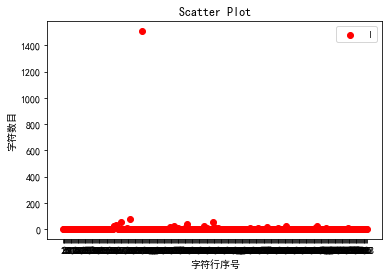

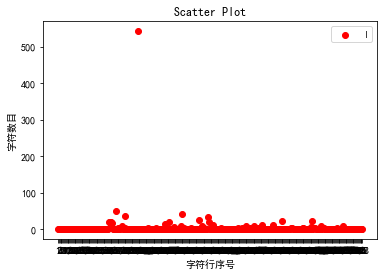

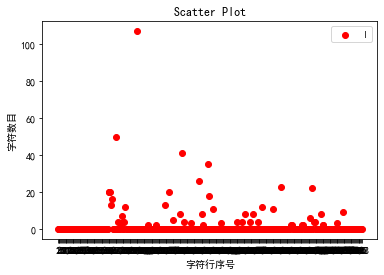

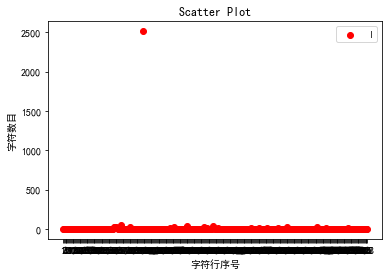

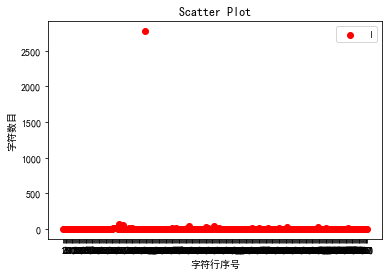

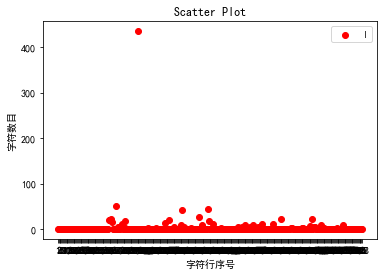

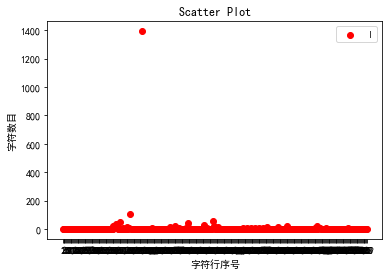

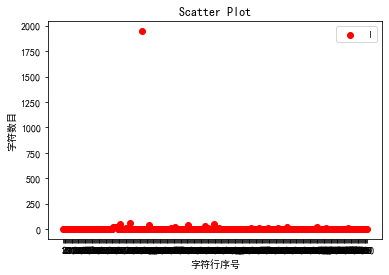

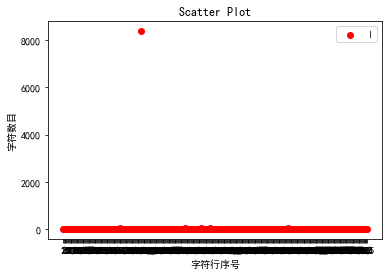

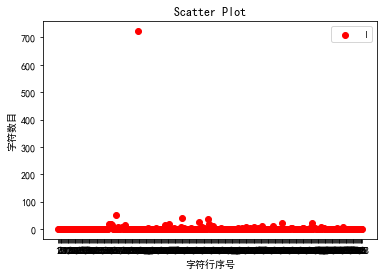

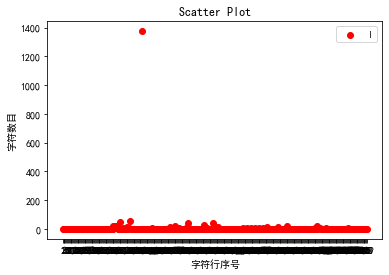

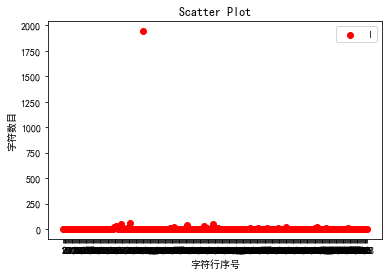

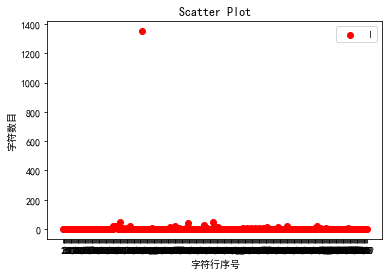

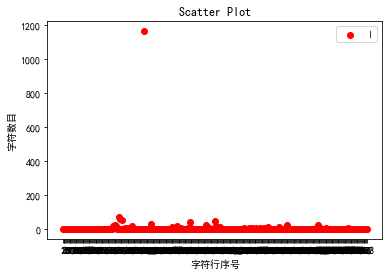

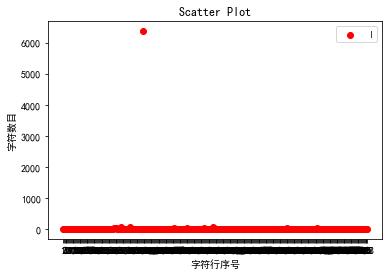

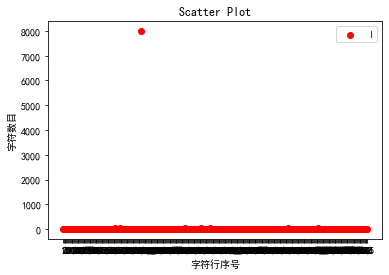

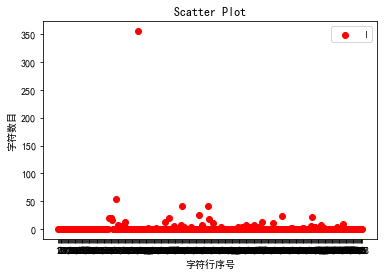

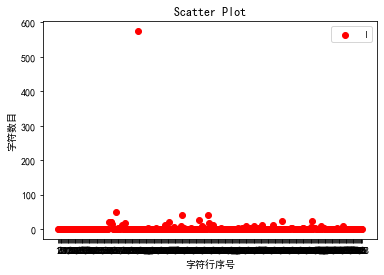

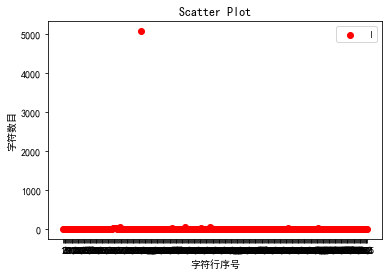

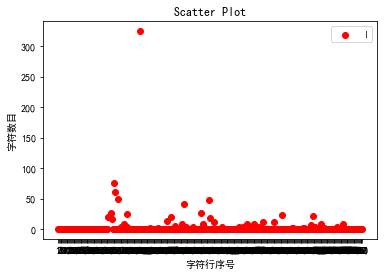

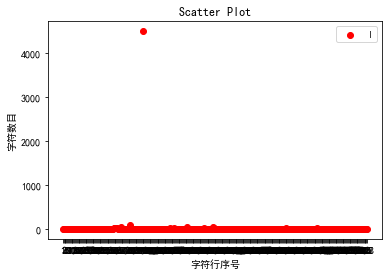

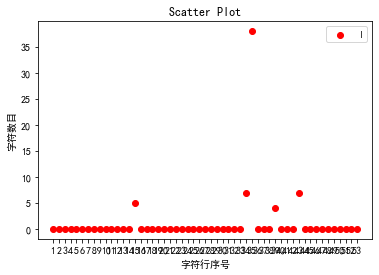

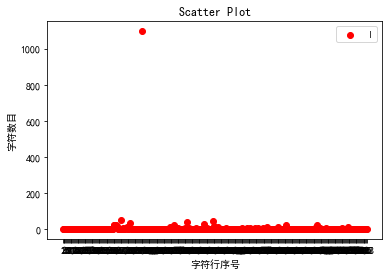

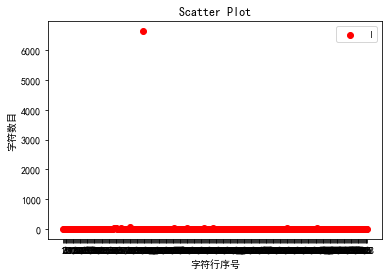

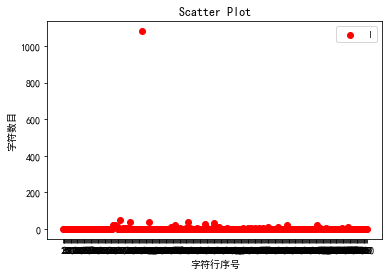

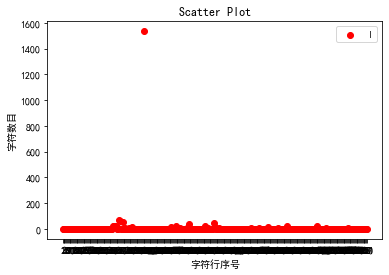

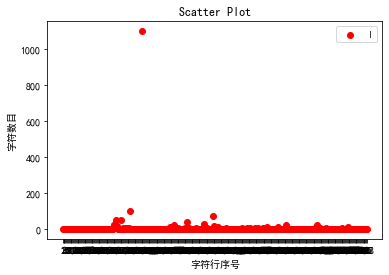

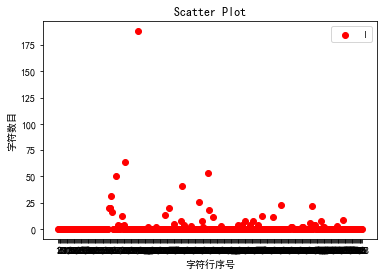

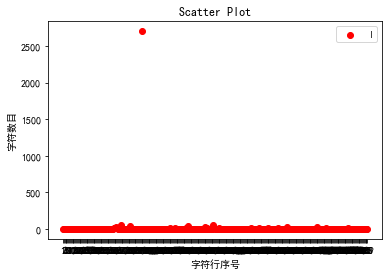

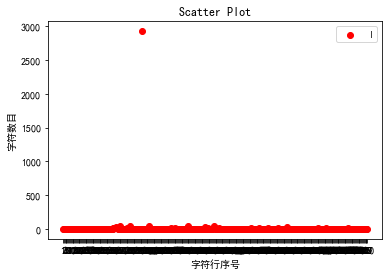

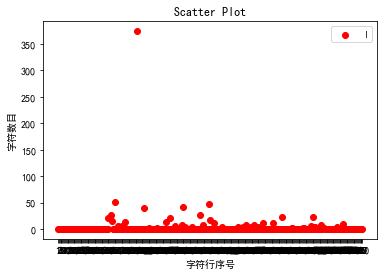

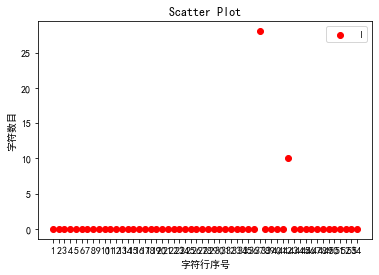

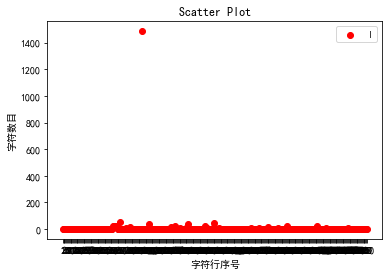

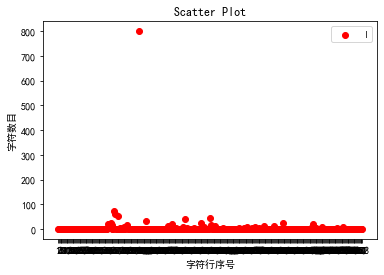

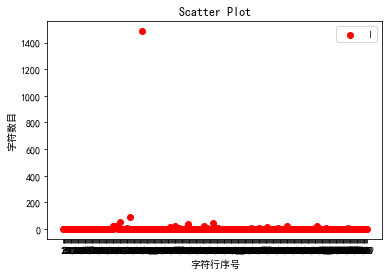

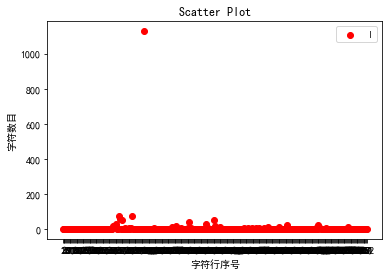

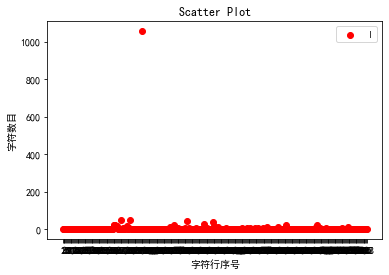

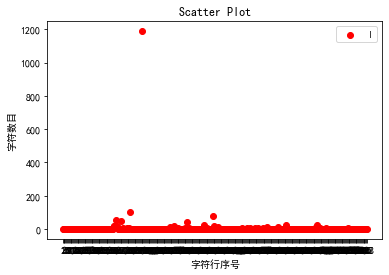

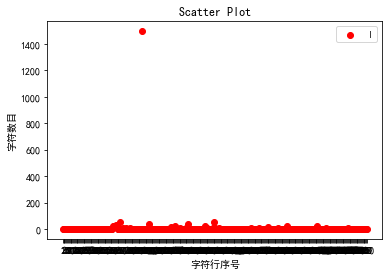

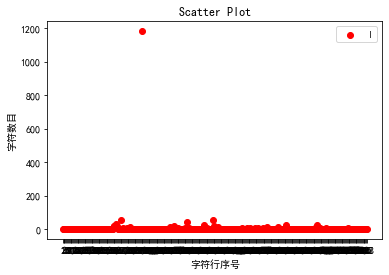

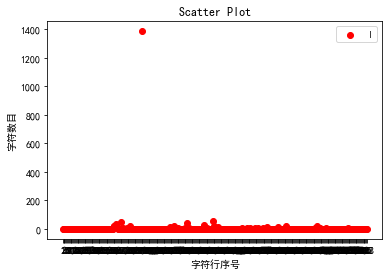

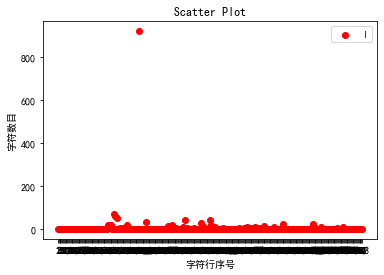

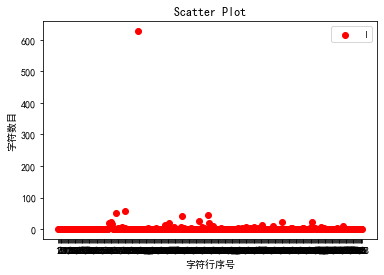

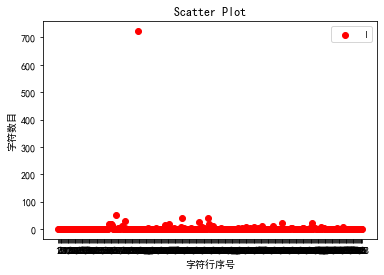

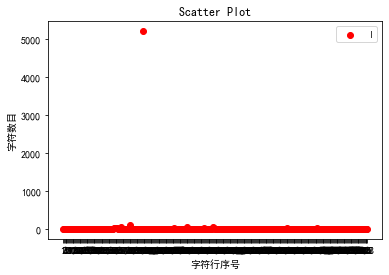

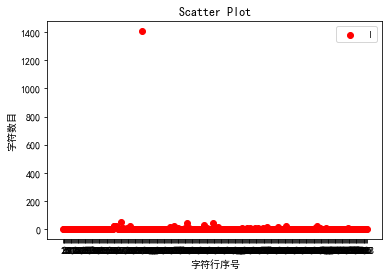

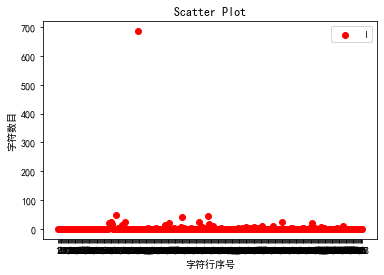

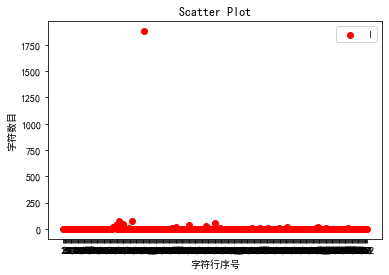

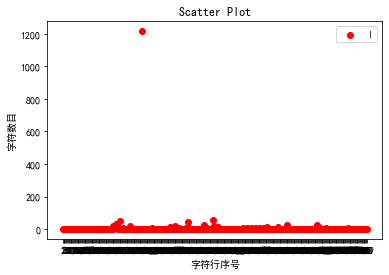

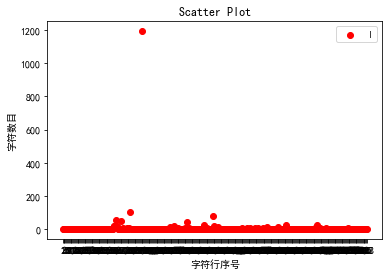

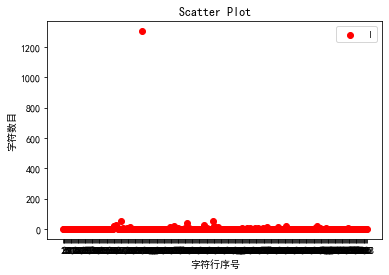

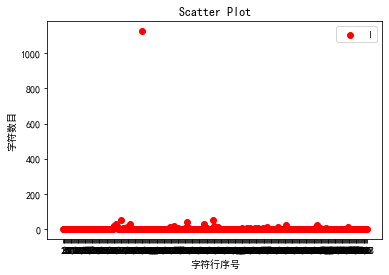

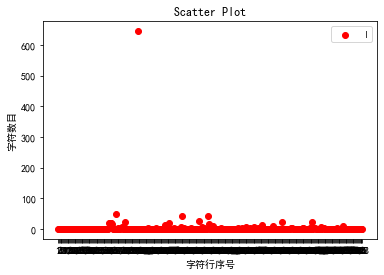

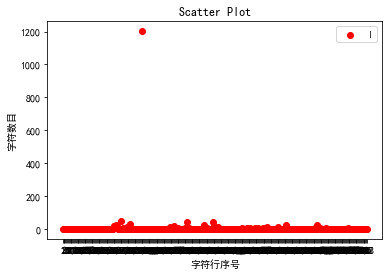

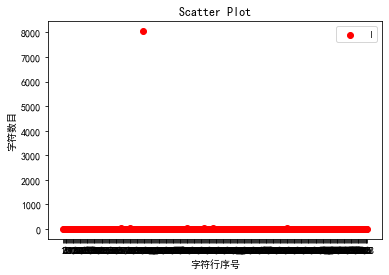

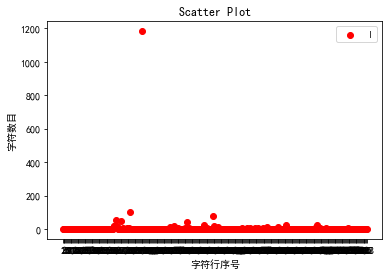

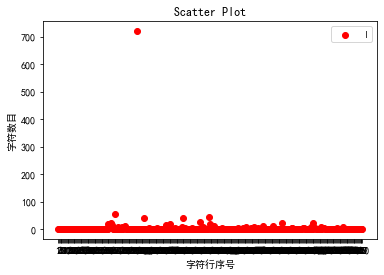

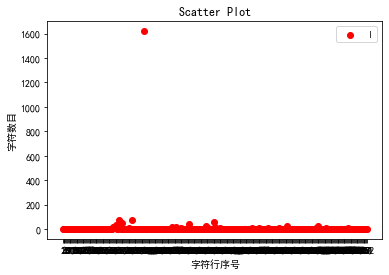

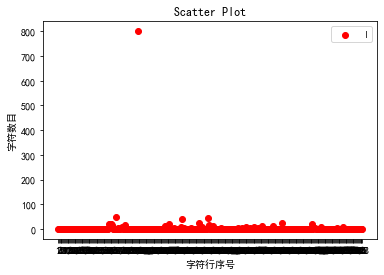

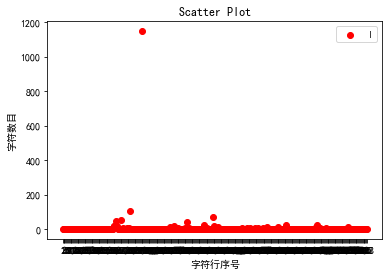

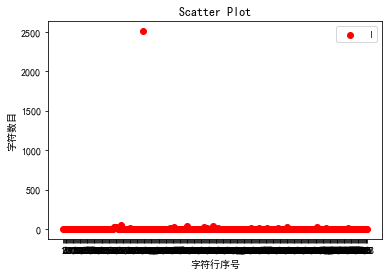

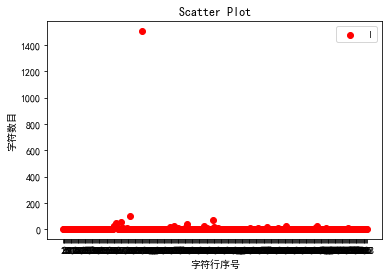

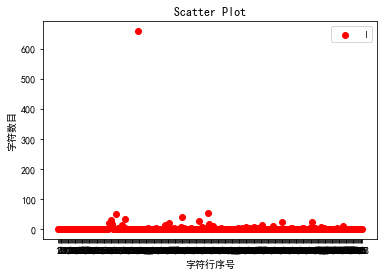

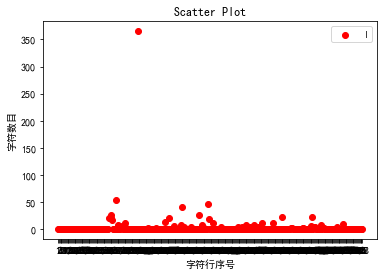

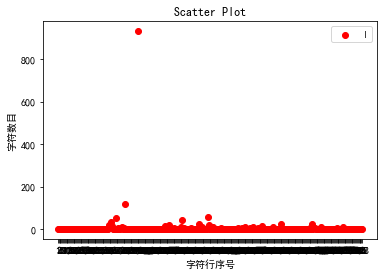

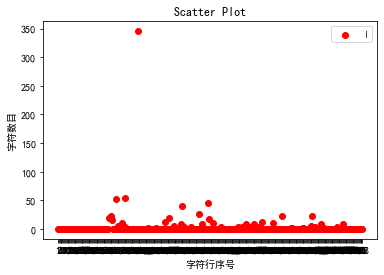

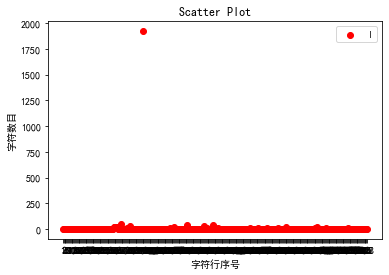

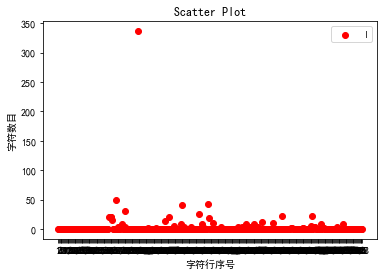

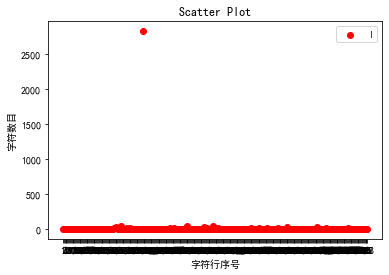

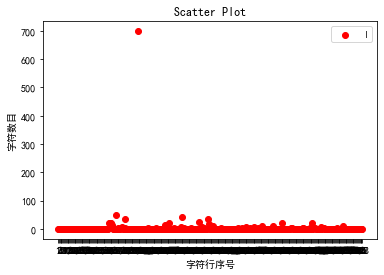

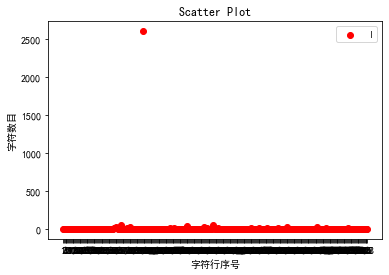

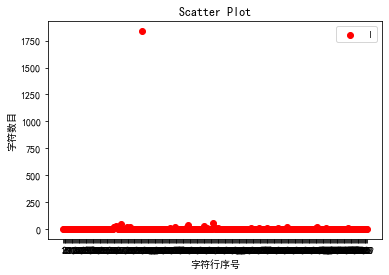

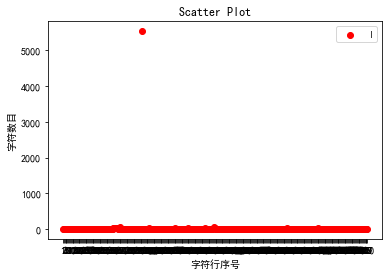

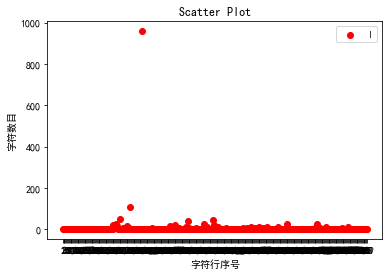

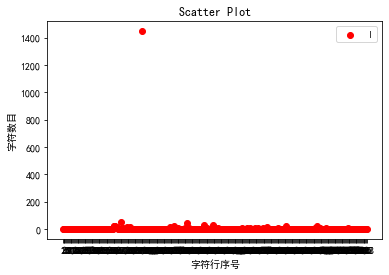

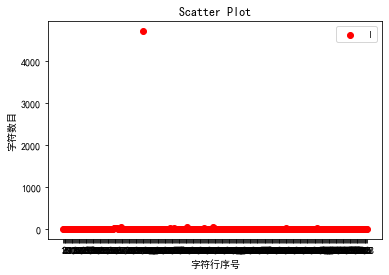

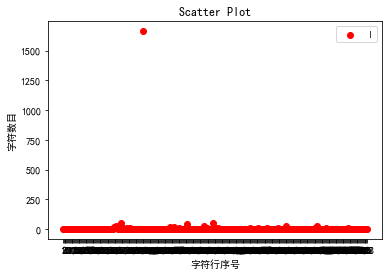

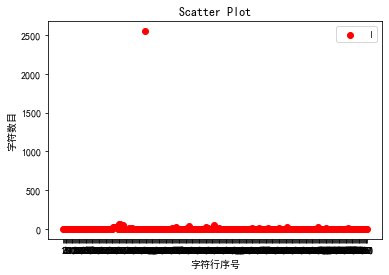

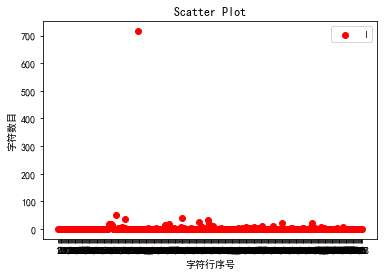

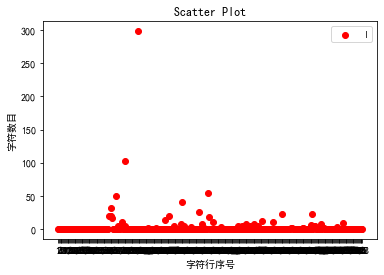

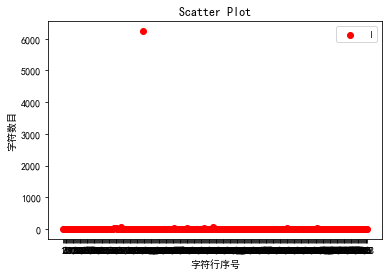

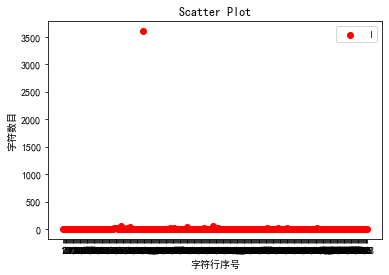

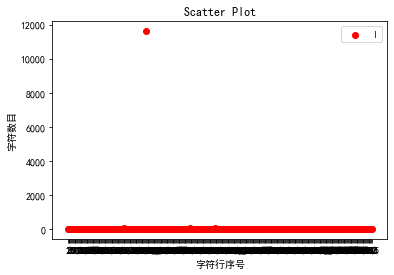

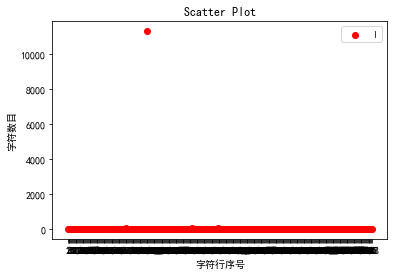

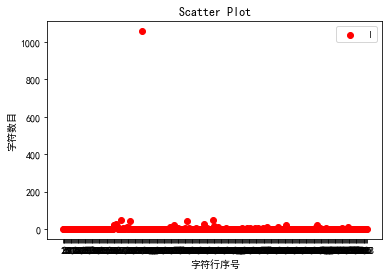

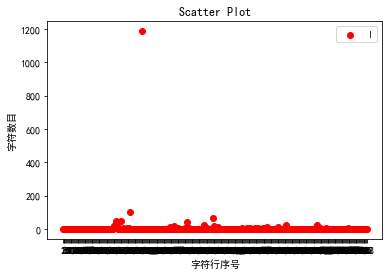

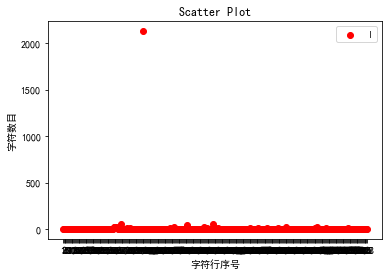

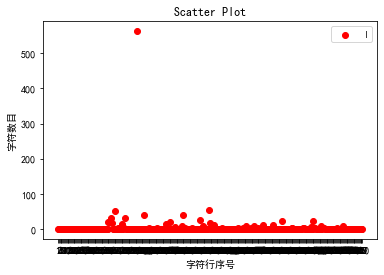

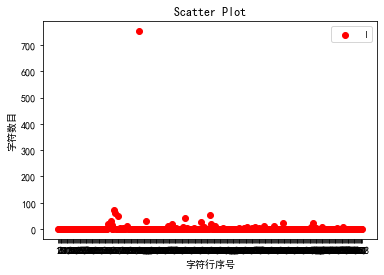

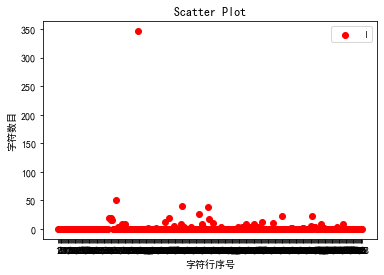

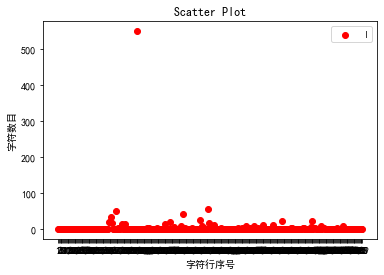

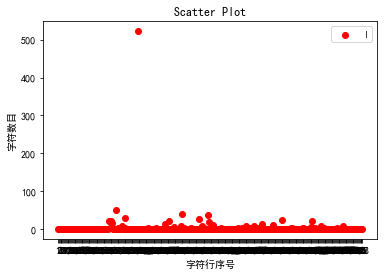

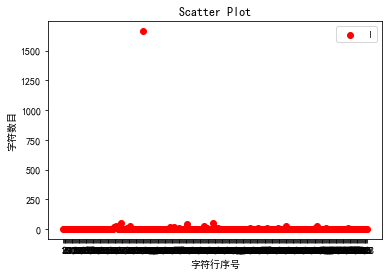

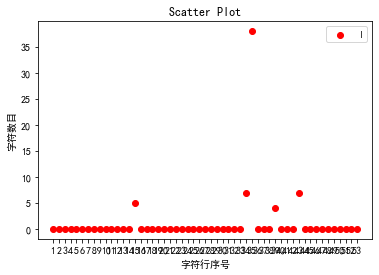

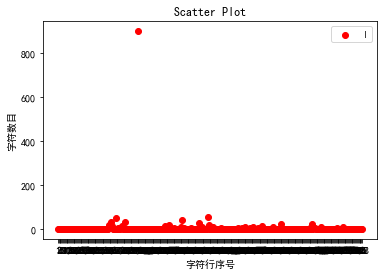

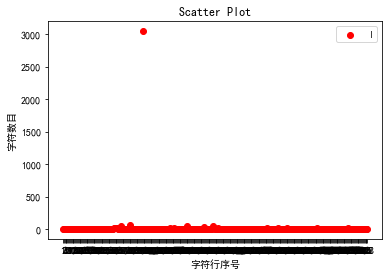

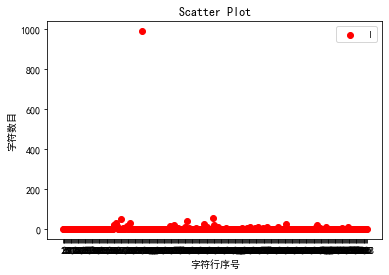

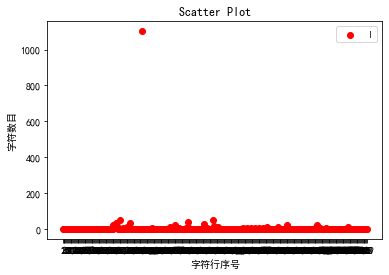

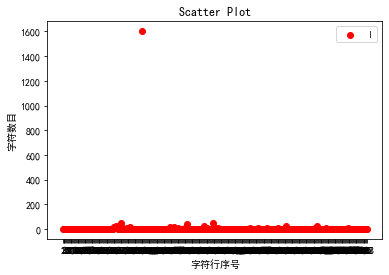

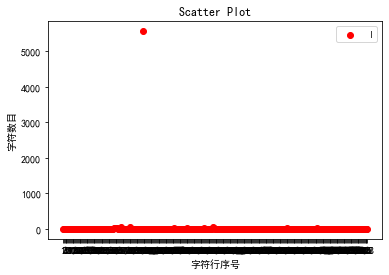

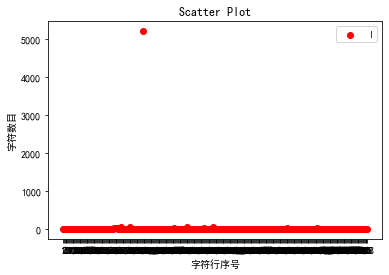

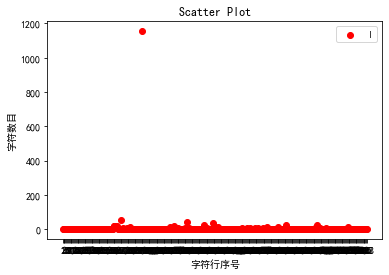

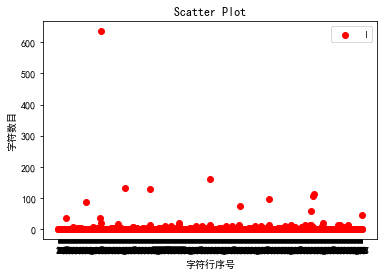

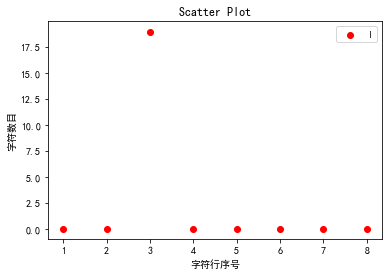

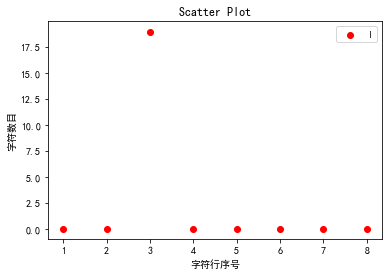

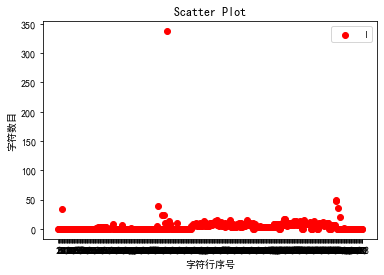

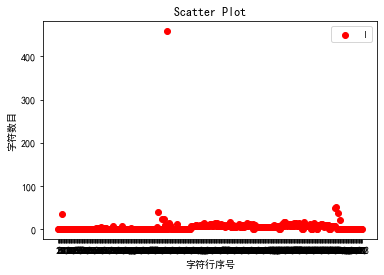

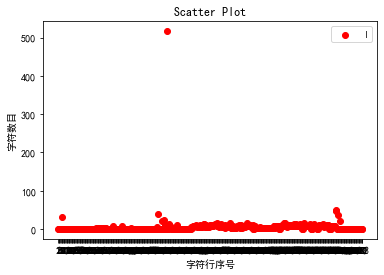

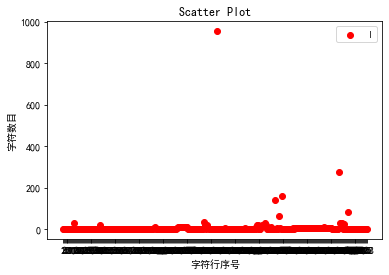

In [396]:
t_list = []
y_list = []
s_list = []
for url in df['url']:
    t,y,s = get_data(url,print_plot=True)
    t_list.append(t)
    s_list.append(s)
    y_list.append(y)

In [399]:
data={'url':df['url'],'title':t_list,'text':s_list,'text_count':y_list}
df = pd.DataFrame(data)

In [401]:
df.to_csv('./text_split_by_row.csv')